<a href="https://colab.research.google.com/github/walter708/Awesome/blob/master/ECE657A_Assignment2_Seed_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [ ]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


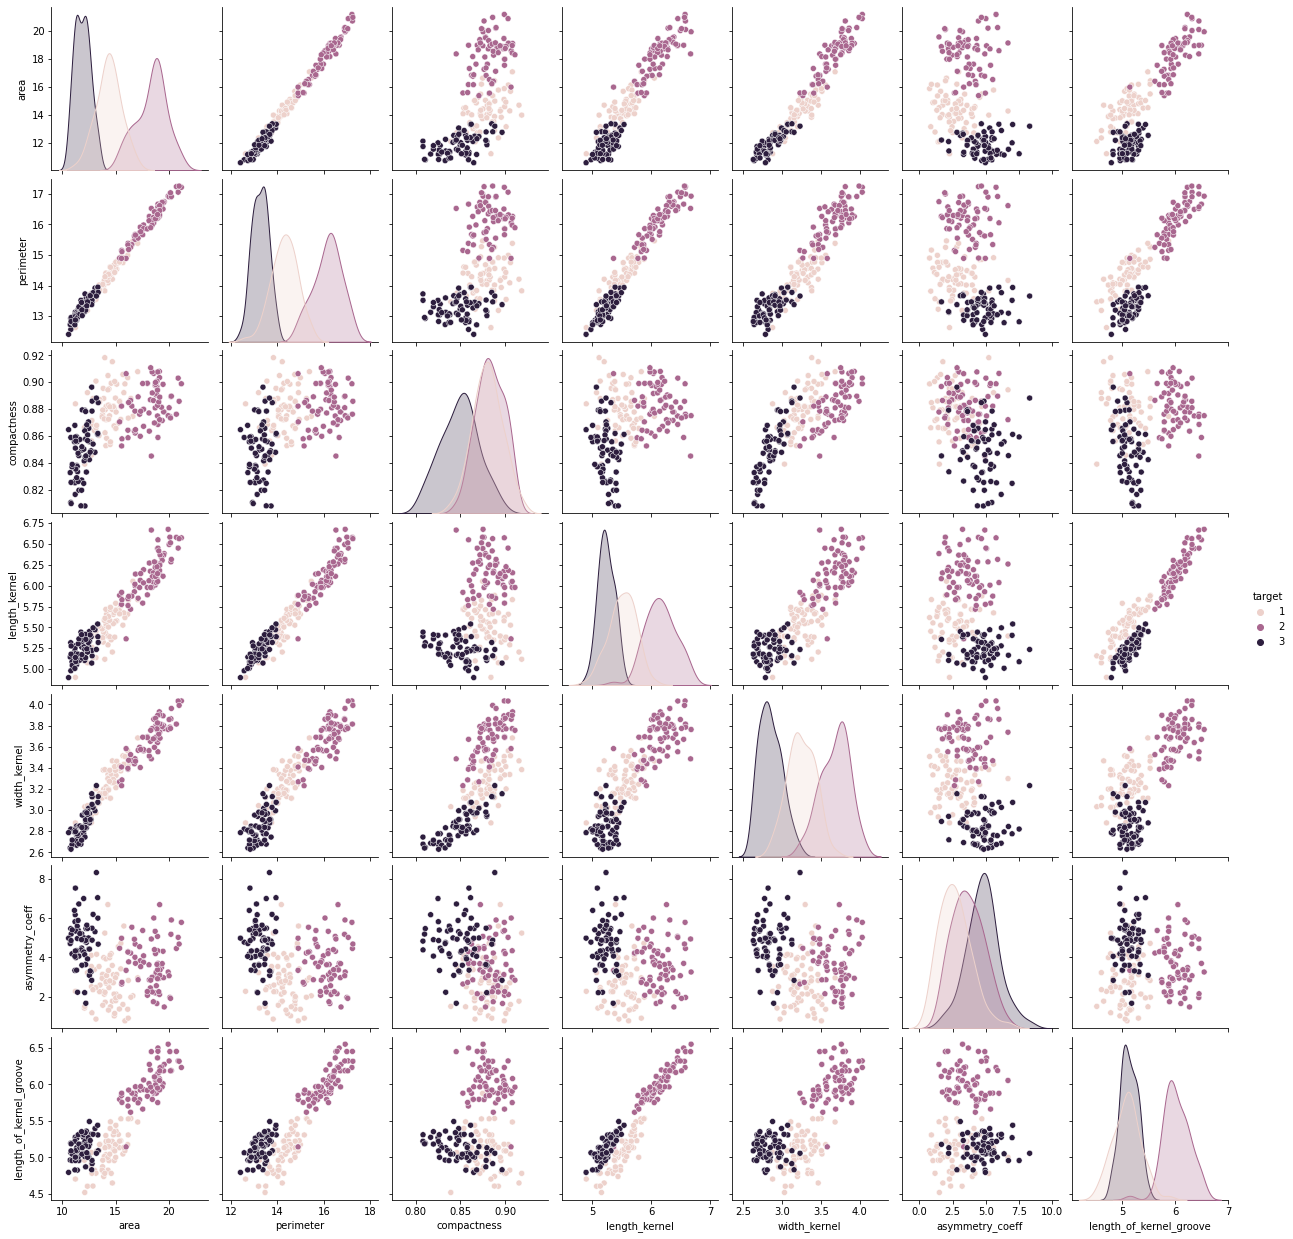

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='target')

In [ ]:
#Checking for missing values 
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length_kernel              0
width_kernel               0
asymmetry_coeff            0
length_of_kernel_groove    0
target                     0
dtype: int64

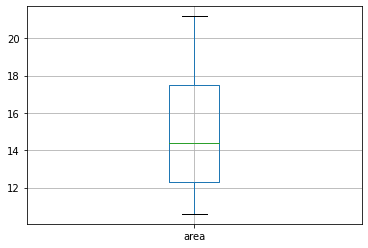

In [ ]:
#Checking for outliers 
figure = df.boxplot(column='area')

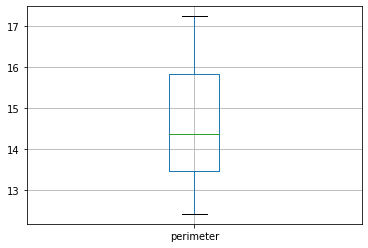

In [ ]:
figure = df.boxplot(column='perimeter')

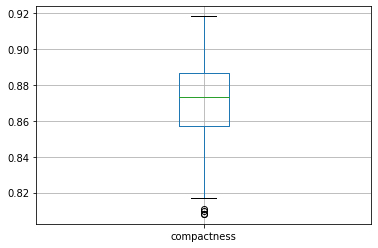

In [ ]:
figure = df.boxplot(column='compactness')

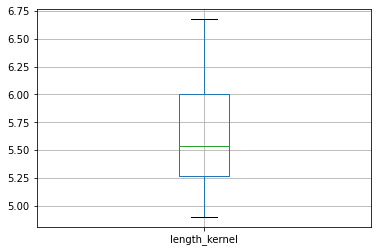

In [ ]:
figure = df.boxplot(column='length_kernel')

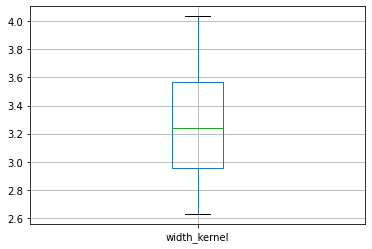

In [ ]:
figure = df.boxplot(column='width_kernel')

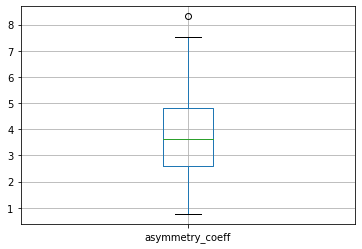

In [ ]:
figure = df.boxplot(column='asymmetry_coeff')

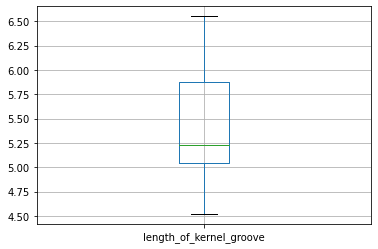

In [ ]:
figure = df.boxplot(column='length_of_kernel_groove')

##### Analysing the box plot each feature above we dicover that "asymmetry_coeff", "compactness" contain outliers which are unusual observations that are far removed from the mass of data.

In [ ]:
# Removing Outliers 
outlier_columns = ['asymmetry_coeff', 'compactness']
for column in outlier_columns:
  IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
  if column in outlier_columns[:-1]:
    upper_bound = df[column].quantile(0.75)+(IQR * 1.5)
    mean = df[column].mean()
    df.loc[df[column] >= upper_bound , column] = upper_bound
  else:
    lower_bound = df[column].quantile(0.25)-(IQR*1.5)
    mean = df[column].mean()
    df.loc[df[column] <= lower_bound , column] = df[column].mean()
  

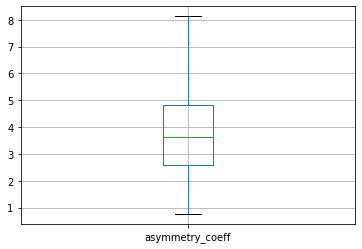

In [ ]:
figure = df.boxplot(column='asymmetry_coeff')

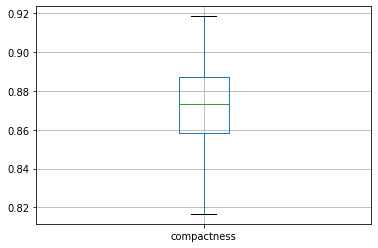

In [ ]:
figure = df.boxplot(column='compactness')

In [ ]:
## Extracting the dependent and the independent variable 
y = df.iloc[: ,-1]
X = df.iloc[:,:-1]

In [ ]:
# split the data into training and testing sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state = 0 ,test_size = 0.2)

### Building an Initial Model Using Decision Tree,

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# create a decision tree fit it to the training data
model_dt_1 = DecisionTreeClassifier(random_state = 0)
model_dt_1 = model_dt_1.fit(X_train , y_train)

In [ ]:
y_predict = model_dt_1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.9

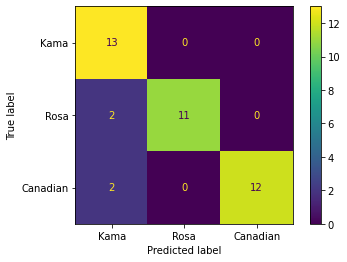

In [ ]:
plot_confusion_matrix(model_dt_1,X_test,y_test,display_labels=["Kama","Rosa","Canadian"])

### Hyparameter Tuning For Decision Trees

In [ ]:
model_dt_2 = DecisionTreeClassifier(random_state = 0)

In [ ]:
para_dist ={
    "max_depth":[3, 5, 10, None]
}

In [ ]:
grid_dist = GridSearchCV(model_dt_2,param_grid=para_dist,cv=10)

In [ ]:
grid_dist.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [ ]:
grid_dist.cv_results_

{'mean_fit_time': array([0.00340381, 0.00214398, 0.00191562, 0.00211456]),
 'mean_score_time': array([0.00161469, 0.00090692, 0.00086668, 0.00094299]),
 'mean_test_score': array([0.87916667, 0.89875   , 0.905     , 0.905     ]),
 'param_max_depth': masked_array(data=[3, 5, 10, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': None}],
 'rank_test_score': array([4, 3, 1, 1], dtype=int32),
 'split0_test_score': array([0.875 , 0.875 , 0.8125, 0.8125]),
 'split1_test_score': array([0.9375, 1.    , 1.    , 1.    ]),
 'split2_test_score': array([0.9375, 0.9375, 1.    , 1.    ]),
 'split3_test_score': array([0.875 , 0.875 , 0.9375, 0.9375]),
 'split4_test_score': array([0.8125, 0.875 , 0.875 , 0.875 ]),
 'split5_test_score': array([1.    , 0.9375, 0.9375, 0.9375]),
 'split6_test_score': array([0.8125, 0.75  , 0.75  , 0.75  ]),
 'split7_test_score': ar

In [ ]:
grid_dist.best_params_

{'max_depth': 10}

In [ ]:
max_depth = [3, 5, 10, 'None']

In [ ]:
mean_accuracies =grid_dist.cv_results_['mean_test_score']

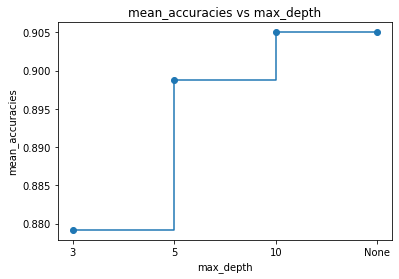

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel("max_depth")
axis.set_ylabel("mean_accuracies")
axis.set_title("mean_accuracies vs max_depth")
axis.plot(max_depth, mean_accuracies, marker ='o' , label="train",drawstyle ="steps-post")


In [ ]:
model_dt_3 = DecisionTreeClassifier(random_state = 0 , max_depth=10)

In [ ]:
model_dt_3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_dt = model_dt_3.predict(X_test)

In [ ]:
accuracy_dt = accuracy_score(y_test ,y_pred_dt)
accuracy_dt

0.9

### Examination of  the final resulting splitting rules used for the trees

[Text(804.8076923076923, 366.93, 'length_of_kernel_groove <= 5.573\ngini = 0.666\nsamples = 158\nvalue = [52, 55, 51]\nclass = Rosa'),
 Text(429.2307692307692, 285.39, 'perimeter <= 13.8\ngini = 0.5\nsamples = 102\nvalue = [51, 0, 51]\nclass = Kama'),
 Text(214.6153846153846, 203.85000000000002, 'length_of_kernel_groove <= 4.789\ngini = 0.278\nsamples = 60\nvalue = [10, 0, 50]\nclass = Canadian'),
 Text(107.3076923076923, 122.31, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = Kama'),
 Text(321.9230769230769, 122.31, 'area <= 12.71\ngini = 0.165\nsamples = 55\nvalue = [5, 0, 50]\nclass = Canadian'),
 Text(214.6153846153846, 40.77000000000004, '\n  (...)  \n'),
 Text(429.2307692307692, 40.77000000000004, '\n  (...)  \n'),
 Text(643.8461538461538, 203.85000000000002, 'area <= 13.115\ngini = 0.046\nsamples = 42\nvalue = [41, 0, 1]\nclass = Kama'),
 Text(536.5384615384615, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Canadian'),
 Text(751.1538461538462, 122.31, 'gini =

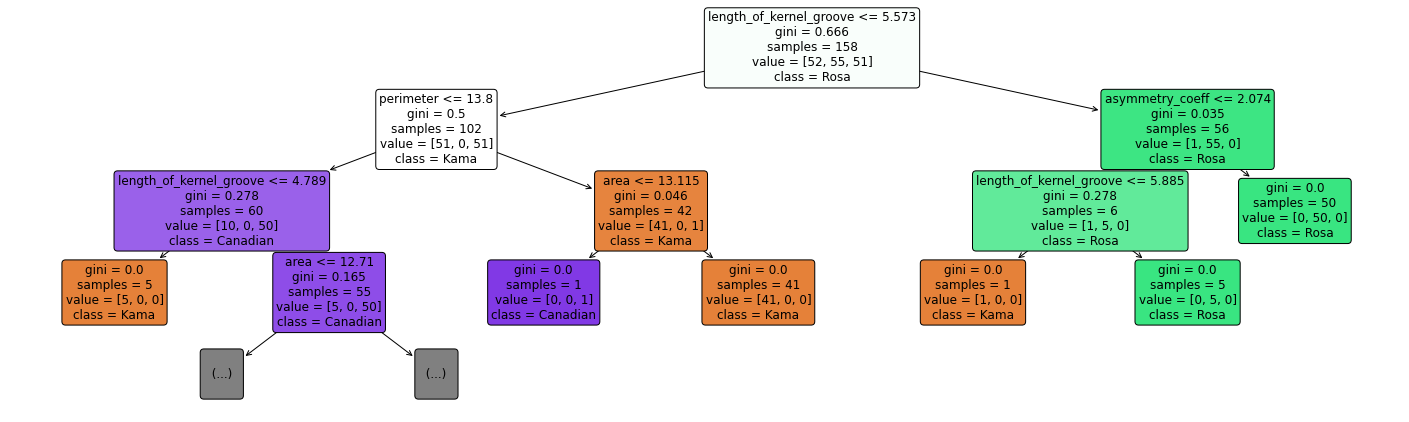

In [ ]:
plt.figure(figsize=(25, 7.5))
tree.plot_tree(model_dt_3,max_depth=3,
          feature_names = X.columns,
          class_names =["Kama","Rosa","Canadian"],
          filled =True,
          rounded = True
          )

### Building an Initial Model Using Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model_rand = RandomForestClassifier(random_state=0)
model_rand.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

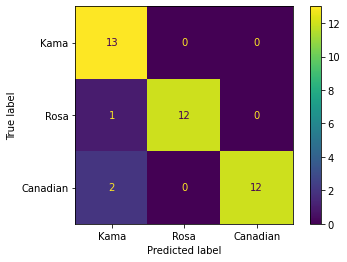

In [ ]:
plot_confusion_matrix(model_rand,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

In [ ]:
y_rand_pred = model_rand.predict(X_test)

In [ ]:
accuracy_score(y_test, y_rand_pred)

0.925

### Hyperparameter Tuning For Random Forest

In [ ]:
model_rand_2 = RandomForestClassifier(random_state=0)


In [ ]:
para_random ={
    "n_estimators": [5, 10, 50, 150, 200],
    "max_depth":[3, 5, 10, None]
}

In [ ]:
grid_random = GridSearchCV(model_rand_2 , param_grid = para_random , cv =10)

In [ ]:
grid_random.fit(X_train , y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [ ]:
mean_rand_accuracies = grid_random.cv_results_['mean_test_score']
mean_rand_accuracies

array([0.89166667, 0.89208333, 0.9175    , 0.89208333, 0.89833333,
       0.89833333, 0.92416667, 0.91791667, 0.9175    , 0.9175    ,
       0.89833333, 0.92416667, 0.91166667, 0.9175    , 0.91125   ,
       0.89833333, 0.92416667, 0.91166667, 0.9175    , 0.91125   ])

In [ ]:
grid_random.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
q=0
w=1
e=2
r=3
t=4
arr1=[]
arr2=[]
arr3=[]
arr4=[]
arr5=[]
for val in range(4):
  arr1.append(mean_rand_accuracies[q])
  arr2.append(mean_rand_accuracies[w])
  arr3.append(mean_rand_accuracies[e])
  arr4.append(mean_rand_accuracies[r])
  arr5.append(mean_rand_accuracies[t])
  q+=5
  w+=5
  e+=5
  r+=5
  t+=5


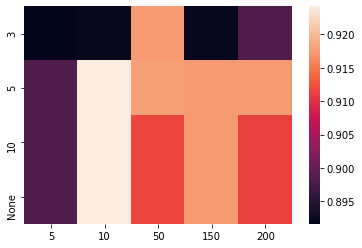

In [ ]:
data = pd.DataFrame({'5': arr1,'10': arr2 ,'50': arr3,'150': arr4,'200': arr5})
data.index = ['3','5','10','None']
plo = sns.heatmap(data)
plt.show()

#### Fiting data with Random forest using best parameter

In [ ]:
grid_random.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
model_rand_3 = RandomForestClassifier(max_depth=5 ,  n_estimators=10)

In [ ]:
model_rand_3.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

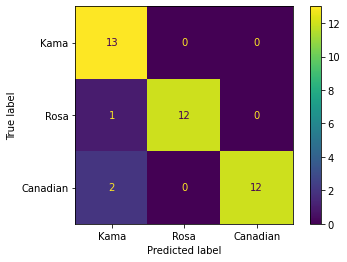

In [ ]:
plot_confusion_matrix(model_rand_3,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

In [ ]:
y_pred_random = model_rand_3.predict(X_test)

In [ ]:
accuracy_rand_score = accuracy_score(y_test , y_pred_random)

In [ ]:
accuracy_rand_score

0.925

### Building an Initial Model Using Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbt_1 = GradientBoostingClassifier(random_state=0)
model_gbt_1.fit(X_train , y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_gbt_pred = model_gbt_1.predict(X_test)

In [ ]:
accuracy_gbt_score = accuracy_score(y_test , y_gbt_pred)

In [ ]:
accuracy_gbt_score

0.975

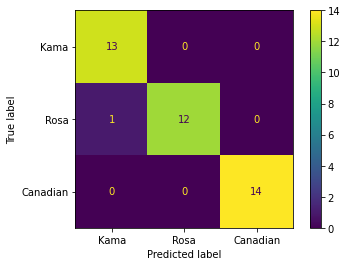

In [ ]:
plot_confusion_matrix(model_gbt_1,
                      X_test,
                      y_test,
                      display_labels=['Kama','Rosa','Canadian'])

### Hyperparameter Tuning For Gradient Tree Boosting 

In [ ]:
model_gbt_2 = GradientBoostingClassifier(random_state=0)

In [ ]:
n_estimators_gbt= [5, 10, 50, 150, 200]

In [ ]:
para_dist_gbt ={
    "n_estimators": [5, 10, 50, 150, 200]
}

In [ ]:
grid_gbt = GridSearchCV(model_gbt_2, param_grid = para_dist_gbt , cv =10)

In [ ]:
grid_gbt.fit(X_train , y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [ ]:
grid_gbt.best_params_

{'n_estimators': 150}

In [ ]:
grid_gbt.cv_results_

{'mean_fit_time': array([0.01728625, 0.02877088, 0.13243983, 0.31464407, 0.37233984]),
 'mean_score_time': array([0.00158715, 0.00142407, 0.00144789, 0.00164723, 0.00176601]),
 'mean_test_score': array([0.91125   , 0.905     , 0.93083333, 0.93708333, 0.93708333]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'rank_test_score': array([4, 5, 3, 1, 1], dtype=int32),
 'split0_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split1_test_score': array([0.9375, 0.9375, 1.    , 1.    , 1.    ]),
 'split2_test_score': array([1.    , 0.9375, 0.9375, 1.    , 1.    ]),
 'split3_test_score': array([0.875 , 0.875 , 0.9375, 0.9375, 0.9375]),
 'split4_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split5_test_score': array([

In [ ]:
mean_accuracies_gbt = grid_gbt.cv_results_['mean_test_score']

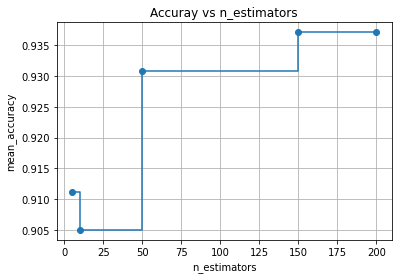

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel("n_estimators")
axis.set_ylabel("mean_accuracy")
axis.set_title("Accuray vs n_estimators")
axis.plot(n_estimators_gbt, mean_accuracies_gbt, marker ='o' , label="train",drawstyle ="steps-post")
plt.grid()

#### Fiting Data With Gradient Tree Boasting Using Best Parameter


In [ ]:
model_gbt_3 = GradientBoostingClassifier(random_state=0, n_estimators=150)

In [ ]:
model_gbt_3.fit(X_train , y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_b = model_gbt_3.predict(X_test)

In [ ]:
accuracy_gbt = accuracy_score(y_test , y_pred_b)
accuracy_gbt

0.975

## NORMALIZATION
MinMax Scaler this scaler reduces the feature vectors of each feature to be within (0 , 1)

In [ ]:
scaler_min = MinMaxScaler()
X_norm = scaler_min.fit_transform(X)
X_norm

array([[0.40509915, 0.44628099, 0.63385827, ..., 0.50106914, 0.0343403 ,
        0.21516494],
       [0.34938621, 0.34710744, 0.86909449, ..., 0.50392017, 0.26259671,
        0.1506647 ],
       [0.3068933 , 0.3161157 , 0.77559055, ..., 0.53385602, 0.20285083,
        0.14081733],
       ...,
       [0.24645892, 0.25826446, 0.70472441, ..., 0.42908054, 1.        ,
        0.26440177],
       [0.11803588, 0.16528926, 0.3484252 , ..., 0.14682823, 0.38466839,
        0.25849335],
       [0.16147309, 0.19214876, 0.50885827, ..., 0.24518888, 0.66153622,
        0.26784835]])

In [ ]:
X_train_min, X_test_min, y_train_min , y_test_min =train_test_split(X_norm, y, test_size = 0.20 , random_state =0)

### Decision Tree -Normalized data 

In [ ]:
model_dt_4 = DecisionTreeClassifier(random_state = 0, max_depth=10 )
model_dt_4.fit(X_train_min,y_train_min)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_min = model_dt_4.predict(X_test_min)

In [ ]:
accuracy_score(y_test_min, y_pred_min)

0.9

### Random Forest -Normalized data 

In [ ]:
model_rand_4 = RandomForestClassifier(random_state=0, n_estimators= 50 , max_depth=5)
model_rand_4.fit(X_train_min , y_train_min)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_rand_pred_min = model_rand_4.predict(X_test_min)
accuracy_score(y_test, y_rand_pred_min)

0.925

### Gradiant Tree Boosting  -Normalized data

In [ ]:
model_gbt_4 = GradientBoostingClassifier(random_state=0, n_estimators=50)
model_gbt_4.fit(X_train_min , y_train_min)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_gbt_pred_min = model_gbt_4.predict(X_test_min)

accuracy_score(y_test , y_gbt_pred_min)

0.975

## BUILDING AN INITIAL NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_naive_1 = GaussianNB()
model_naive_1.fit(X_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_naiveB_pred = model_naive_1.predict(X_test)

In [ ]:
accuracy_naive_base = accuracy_score(y_test , y_naiveB_pred)

In [ ]:
accuracy_naive_base

0.9

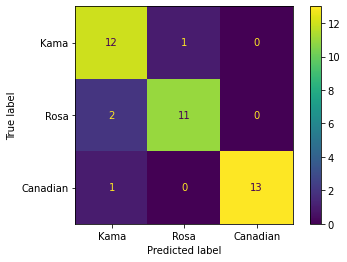

In [ ]:
plot_confusion_matrix(model_naive_1,X_test,y_test,display_labels=["Kama","Rosa","Canadian"])

## HYPERPARAMETER TUNING FOR  NAIVE BASED CLASSIFER

In [ ]:
model_naive_2 = GaussianNB()

In [ ]:
var_smoothing = [1e-10 , 1e-9 , 1e-5,1e-3,1e-1]

In [ ]:
param_naive = {
    "var_smoothing":[1e-10 , 1e-9 , 1e-5,1e-3,1e-1]
}

In [ ]:
grid_naive = GridSearchCV(model_naive_2, param_grid = param_naive , cv = 10 )

In [ ]:
grid_naive.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_naive.best_params_

{'var_smoothing': 0.001}

In [ ]:
grid_naive.cv_results_

{'mean_fit_time': array([0.00331662, 0.00230424, 0.00150375, 0.00163686, 0.00175905]),
 'mean_score_time': array([0.00202014, 0.00129979, 0.00089934, 0.00092933, 0.00099947]),
 'mean_test_score': array([0.905     , 0.905     , 0.905     , 0.9175    , 0.89833333]),
 'param_var_smoothing': masked_array(data=[1e-10, 1e-09, 1e-05, 0.001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-10},
  {'var_smoothing': 1e-09},
  {'var_smoothing': 1e-05},
  {'var_smoothing': 0.001},
  {'var_smoothing': 0.1}],
 'rank_test_score': array([2, 2, 2, 1, 5], dtype=int32),
 'split0_test_score': array([0.875, 0.875, 0.875, 0.875, 0.875]),
 'split1_test_score': array([0.875 , 0.875 , 0.875 , 0.9375, 0.875 ]),
 'split2_test_score': array([0.9375, 0.9375, 0.9375, 1.    , 1.    ]),
 'split3_test_score': array([1.    , 1.    , 1.    , 1.    , 0.9375]),
 'split4_test_score': array([0.875 , 0.875 , 0.875 , 0.9375, 0.93

In [ ]:
mean_accuracies_naive = grid_naive.cv_results_['mean_test_score']

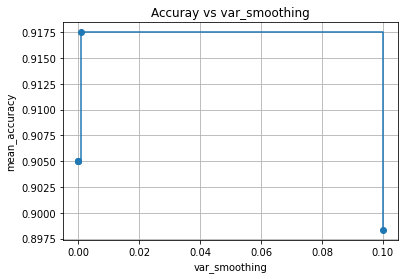

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel("var_smoothing")
axis.set_ylabel("mean_accuracy")
axis.set_title("Accuray vs var_smoothing")
axis.plot(var_smoothing, mean_accuracies_naive , marker ='o' , label="train",drawstyle ="steps-post")
plt.grid()

#### FITTING DATA WITH GAUSSIAN NB USING BEST PARAMETER FOR VAR_SMOOTHING

In [ ]:
model_naive_3 = GaussianNB(var_smoothing=1e-3)

In [ ]:
model_naive_3.fit(X_train , y_train)

GaussianNB(priors=None, var_smoothing=0.001)

In [ ]:
y_naiveB_pred_1 = model_naive_3.predict(X_test)

In [ ]:
accuracy_naive_base_1 = accuracy_score(y_test , y_naiveB_pred_1)

In [ ]:
accuracy_naive_base_1

0.925

## NAIVE BAYES CLASSIFER - NORMALIZED DATA

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_train_std, X_test_std, y_train_std , y_test_std = train_test_split(X_std, y, test_size = 0.20 , random_state =0)

In [ ]:
model_naive_4 = GaussianNB(var_smoothing=1e-3)

In [ ]:
model_naive_4.fit(X_train_std , y_train_std)

GaussianNB(priors=None, var_smoothing=0.001)

In [ ]:
y_naiveB_pred_std = model_naive_4.predict( X_test_std)

In [ ]:
accuracy_naive_base_std = accuracy_score(y_test_std , y_naiveB_pred_std)

In [ ]:
accuracy_naive_base_std

0.9